# Word2Vec 

"*Dime con quien andas y te diré quién eres*" - [Francisco de Quevedo en el siglo XVI](https://significalogia.com/dime-con-quien-andas-y-te-dire-quien-eres-significado-y-origen-de-este-refran/)
                                
*Word2Vec* es una técnica de **Procesamiento del Lenguaje Natural** (*NLP*) utilizada para representar palabras como vectores (en un **espacio continuo**) de características numéricas de baja dimensión. Este método, desarrollado por un equipo de Google dirigido por Tomas Mikolov en 2013, ha revolucionado la forma en que se representan las palabras en el espacio vectorial, permitiendo que las máquinas comprendan y procesen el texto de una manera más eficiente y efectiva.

*Word2Vec* utiliza dos arquitecturas principales para aprender las representaciones de las palabras:

1. **CBOW** (Continuous Bag of Words): Predice una palabra objetivo basada en su contexto circundante. Es decir, toma las palabras del contexto y trata de predecir la palabra central.
1. **Skip-gram**: Predice el contexto de una palabra objetivo. Toma una palabra central y trata de predecir las palabras circundantes en el contexto.

Ambos métodos se basan en redes neuronales simples y generan vectores de palabras que capturan las **relaciones semánticas** entre ellas.

El supuesto más importante de *Word2Vec* es que 2 palabras que tienen un **contexto similar**, entonces deben tener un **significado similar**, por ende, una representación vectorial similar.

Por ejemplo, palabras como "*perro*", "*cachorro*", "*mascota*" suelen estar en contextos similares, por ende su representación vectorial en *Word2Vec* debe ser similar. Es posible llegar a este tipo de conclusiones, gracias a que *Word2Vec* captura las relaciones semánticas entre palabras en base a los patrones descubiertos en la co-ocurrencia  de palabras dado un corpus.

# Load data

In [1]:
import pandas as pd

In [2]:
df = pd.read_pickle("../../data/preprocessed/stemm_lemm_stop_words.pkl")

In [3]:
df.columns

Index(['Facebook Id', 'Post Created', 'Total Interactions', 'Likes',
       'Comments', 'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry', 'Care',
       'Message_stpWrd', 'Message_clean_stpWrd', 'Message_clean_stemm_stpWrd',
       'Message_clean_lemm_stpWrd'],
      dtype='object')

En este notebook analizaremos siguientes variables:
- `Message_stpWrd`
- `Message_clean_stpWrd`
- `Message_clean_stemm_stpWrd`
- `Message_clean_lemm_stpWrd`

Específicamente: `Message_clean_lemm_stpWrd`

In [4]:
df[['Message_stpWrd', 'Message_clean_stpWrd', 
    'Message_clean_stemm_stpWrd', 'Message_clean_lemm_stpWrd']].head()

,Message_stpWrd,Message_clean_stpWrd,Message_clean_stemm_stpWrd,Message_clean_lemm_stpWrd
0,Mitigar cambio climático pies tierra. http://r...,mitigar cambio climatico pies tierra,mitig cambi climat pies tierr,mitigar cambio climatico pie tierra
1,#México 🇲🇽 | Ciudad México urbe Latinoamérica ...,mexico ciudad mexico urbe latinoamerica busca ...,mexic ciud mexic urbe latinoamer busc siguient...,mexico ciudad mexico urbe latinoamerica buscar...
2,"2018 comienza deseo corazón hagan disfruten, p...",2018 comienza deseo corazon hagan disfruten ma...,par 2018 comienz dese corazon hag tod disfrut ...,2018 comenzar desear corazon disfrutar mas aun...
3,"ONU lanza alerta roja 2018 armas nucleares, vi...",onu lanza alerta roja 2018 armas nucleares vio...,onu lanz alert roj par 2018 armas nuclear viol...,onu lanzar alerta rojo 2018 arma nuclear viola...
4,Novedoso proyecto busca instalar paneles solar...,novedoso proyecto busca instalar paneles solar...,noved proyect busc instal panel solar lun par ...,novedoso proyecto buscar instalar panel solar ...


In [5]:
df.shape

(87422, 16)

Algunos mensajes (*original*, *limpio*, *stemmatizado* y *lemmatizado*) preprocesados son:

In [6]:
print('ORIGINAL MESSAGE')
for i, text in enumerate(df['Message_stpWrd']):
    print(f"Post {i + 1}: {text}")
    #display(Markdown(f"Post {i + 1}: {text}"))
    if i == 4:
        break
print("\n")

print('CLEAN MESSAGE')
for i, text in enumerate(df['Message_clean_stpWrd']):
    print(f"Post {i + 1}: {text}")
    if i == 4:
        break
print("\n")

print('STEMMED MESSAGE')
for i, text in enumerate(df['Message_clean_stemm_stpWrd']):
    print(f"Post {i + 1}: {text}")
    if i == 4:
        break
print("\n")

print('LEMMATIZED MESSAGE')
for i, text in enumerate(df['Message_clean_lemm_stpWrd']):
    print(f"Post {i + 1}: {text}")
    if i == 4:
        break
print("\n")

ORIGINAL MESSAGE
Post 1: Mitigar cambio climático pies tierra. http://regenerationinternational.org/2017/12/27/agricultura-regenerativa-tierra-cambio-climatico/:=:https://regenerationinternational.org/2017/12/27/agricultura-regenerativa-tierra-cambio-climatico/
Post 2: #México 🇲🇽 | Ciudad México urbe Latinoamérica busca generación mujeres líderes.
Post 3: 2018 comienza deseo corazón hagan disfruten, pero, aún, disfruten hagan. repartan amor lados: seres humanos comunidad seres vivos. terrible calentamiento global serio calentamiento social, violencias, odios, muertes exclusiones, anular densa “amorósfera”: energía amor presente, actuante continua expansión. solidaridad, amor universal haremos presente esperanza 2018. cariño, Victor Quintana
Post 4: ONU lanza alerta roja 2018 armas nucleares, violación DH cambio climático “La unidad camino”, insistió secretario. “Nuestro futuro depende ello”.
Post 5: Novedoso proyecto busca instalar paneles solares luna, abastecer energía planeta Tierra

In [7]:
facebook_post_clean = df['Message_clean_lemm_stpWrd'].values.tolist()
facebook_post_clean[:5]

['mitigar cambio climatico pie tierra',
 'mexico ciudad mexico urbe latinoamerica buscar generacion mujer lider',
 '2018 comenzar desear corazon disfrutar mas aun disfrutar repartir amor humano comunidad vivo terrible calentamiento global aun mas serio calentamiento social violencia odio muerte exclusión anular mas denso amorosfera energia amor presente actuante continuo expansion solidaridad amor universal presente esperanza 2018 carino victor quintana',
 'onu lanzar alerta rojo 2018 arma nuclear violacion dh cambio climatico unidad camino insistio secretario futuro depender',
 'novedoso proyecto buscar instalar panel solar luna abastecer energia planeta tierra']

# Preprocess data: Tokenize by lemmatize text

In [8]:
from tqdm import tqdm

A continuación se van a crear los mensajes tokenizados. En este proyecto un token representa una **palabra**.

In [9]:
%time
tokens_spacy = []
for post in tqdm(facebook_post_clean):
    token_i = [token for token in post.split(' ')]
    tokens_spacy.append(token_i)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 12.2 µs


100%|██████████| 87422/87422 [00:01<00:00, 48919.12it/s]


In [10]:
%time
facebook_posts = []
for post in tqdm(facebook_post_clean):
    token_i = [token for token in post]
    facebook_posts.append(token_i)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 11.2 µs


100%|██████████| 87422/87422 [00:02<00:00, 31872.15it/s]


Así se ven los post procesados como tokens:

In [11]:
for i in tokens_spacy[:5]:
    print(i)

['mitigar', 'cambio', 'climatico', 'pie', 'tierra']
['mexico', 'ciudad', 'mexico', 'urbe', 'latinoamerica', 'buscar', 'generacion', 'mujer', 'lider']
['2018', 'comenzar', 'desear', 'corazon', 'disfrutar', 'mas', 'aun', 'disfrutar', 'repartir', 'amor', 'humano', 'comunidad', 'vivo', 'terrible', 'calentamiento', 'global', 'aun', 'mas', 'serio', 'calentamiento', 'social', 'violencia', 'odio', 'muerte', 'exclusión', 'anular', 'mas', 'denso', 'amorosfera', 'energia', 'amor', 'presente', 'actuante', 'continuo', 'expansion', 'solidaridad', 'amor', 'universal', 'presente', 'esperanza', '2018', 'carino', 'victor', 'quintana']
['onu', 'lanzar', 'alerta', 'rojo', '2018', 'arma', 'nuclear', 'violacion', 'dh', 'cambio', 'climatico', 'unidad', 'camino', 'insistio', 'secretario', 'futuro', 'depender']
['novedoso', 'proyecto', 'buscar', 'instalar', 'panel', 'solar', 'luna', 'abastecer', 'energia', 'planeta', 'tierra']


In [12]:
print(f"Hay un total de {len(tokens_spacy)} mensajes.")

Hay un total de 87422 mensajes.


# Phrase Modelling (N-gram)

**Phrase Modelling** permite obtener combinaciones de tokens (palabras) que juntos representen conceptos de importancia (multi-palabras). Para ello, analizamos las palabras que aparecen en los posts de **Facebook** con el objetivo de analizar cuáles de ellas co-ocurren más frecuente de lo que podríamos esperar. Utilizamos el término *phrase* (*phrase*) bajo el supuesto de que una *frase* es el resultado de unir dos o más palabras. La fórmula que se utilizan los *phrase models* para construir una *frase* dadas $2$ palabras (tokens) $A$ y $B$ es:

$
\frac{count(AB) - count_{min}}{count(A)*count(B)} * N > threshold 
$

En donde,
- $count(A)$ es el número de veces que aparece el token $A$ en el corpus.
- $count(B)$ es el número de veces que aparece el token $B$ en el corpus.
- $count(AB)$ es el número de veces que co-aparecen los token $AB$ (juntos) en el corpus.
- $N$ es el tamaño del vocabulario del corpus (palabras únicas).
- $count_{min}$ hiperparámetro predefinido que asegura que los tokens (en este caso $AB$) co-ocurran al menos un número de veces.
- $threshold$ hiperparámetro predefinido para controlar la "relevancia" que debe tener la co-ocurrencia de dos tokens para ser aceptada como una *frase*.


Se crearán modelos encargados de calcular **n-gramas** (bigrama y trigrama). Para ello se utilizará versión `1.10.1` de `scipy`. La cual puede ser instalada con la siguiente línea de código:

```
pip install scipy==1.10.1
```

In [13]:
import gensim
from collections import Counter

## Bigrams

Creación del modelo para obtener bigramas (*phrase models*)

In [14]:
bigram = gensim.models.Phrases(tokens_spacy)#, min_count=10, threshold=20)

In [15]:
phrases = gensim.models.Phrases(tokens_spacy, progress_per=10000)

In [16]:
bigram = phrases

In [17]:
sentences = bigram[tokens_spacy]

Así se ven los textos convirtiendo tokens a *frases* (bigramas):

In [18]:
posts_bigram = bigram[tokens_spacy]
for i in posts_bigram[:10]:
    print(i)

['mitigar', 'cambio_climatico', 'pie', 'tierra']
['mexico', 'ciudad_mexico', 'urbe', 'latinoamerica', 'buscar', 'generacion', 'mujer', 'lider']
['2018', 'comenzar', 'desear', 'corazon', 'disfrutar', 'mas', 'aun', 'disfrutar', 'repartir', 'amor', 'humano', 'comunidad', 'vivo', 'terrible', 'calentamiento_global', 'aun', 'mas', 'serio', 'calentamiento', 'social', 'violencia', 'odio', 'muerte', 'exclusión', 'anular', 'mas', 'denso', 'amorosfera', 'energia', 'amor', 'presente', 'actuante', 'continuo', 'expansion', 'solidaridad', 'amor', 'universal', 'presente', 'esperanza', '2018', 'carino', 'victor', 'quintana']
['onu', 'lanzar', 'alerta_rojo', '2018', 'arma_nuclear', 'violacion', 'dh', 'cambio_climatico', 'unidad', 'camino', 'insistio', 'secretario', 'futuro', 'depender']
['novedoso', 'proyecto', 'buscar', 'instalar_panel', 'solar', 'luna', 'abastecer', 'energia', 'planeta', 'tierra']
['secretario_general', 'onu_antonio', 'guterres', 'lanzar', 'senal_alerta', 'comunidad_internacional', 'a

In [19]:
posts_bigram

Ahora, procesemos todos los posts utilizando el modelo `bigram`

In [20]:
tokens_bigram = [item for sublist in tokens_spacy for item in bigram[sublist]]
corpus_post_model_bigram = Counter(tokens_bigram)

El top-20 de bigramas (*phrases*) y tokens con mayor frecuencia es:

In [21]:
for word, count in corpus_post_model_bigram.most_common(20):
    print(f'{word}: {count}')

cambio_climatico: 59805
mas: 24803
ano: 12141
mundo: 9860
climatico: 9196
agua: 8722
calentamiento_global: 8717
tambien: 8387
dia: 7779
pais: 7640
planeta: 7299
proyecto: 6888
asi: 6637
ambiental: 6312
medio_ambiente: 6291
ciudad: 6110
nacional: 6081
gobierno: 5894
desarrollo: 5608
tierra: 5423


Mientras que el Top-$20$ de *bigramas* con mayor frecuencia es:

In [22]:
bigrams = [i for i in tokens_bigram if '_' in i]
corpus_bigrams = Counter(bigrams)

In [23]:
for word, count in corpus_bigrams.most_common(20):
    print(f'{word}: {count}')

cambio_climatico: 59805
calentamiento_global: 8717
medio_ambiente: 6291
acuerdo_paris: 3692
lucha_cambio: 2340
donald_trump: 1911
desarrollo_sostenible: 1703
adaptacion_cambio: 1539
naciones_unidas: 1520
recurso_natural: 1450
mas_informacion: 1196
gas_efecto: 1184
energia_renovable: 1182
combatir_cambio: 1169
dia_mundial: 1168
america_latino: 1153
efecto_invernadero: 1127
costa_rico: 1085
hora_planeta: 1080
gestion_riesgo: 1059


# Word2Vec

## CBOW

In [24]:
import multiprocessing
from gensim.models import Word2Vec

In [25]:
cores = multiprocessing.cpu_count()
print(f"Number of cores available: {cores}")

Number of cores available: 4


Definir el modelo

In [26]:
w2v_model = Word2Vec(
    #min_count=20,
    #window=2,
    #sample=6e-5, 
    #alpha=0.03, 
    #min_alpha=0.0007, 
    #negative=20,
    #vector_size=100
    workers=cores-1,
    sg=0,
)

Construir el vocabulario

In [27]:
#w2v_model.build_vocab(tokens_spacy, progress_per=10000)
#w2v_model.build_vocab(sentences, progress_per=10000)
w2v_model.build_vocab(posts_bigram, progress_per=10000)

Entrenar el modelo

In [28]:
#w2v_model.train(tokens_spacy, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)
w2v_model.train(posts_bigram, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(77208922, 83547450)

In [29]:
w2v_model.init_sims(replace=True)

/var/folders/66/5277wsy51nj0m1lc9jvl8zt80000gn/T/ipykernel_26169/514372312.py:1: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model.init_sims(replace=True)


Comportamiento

In [30]:
similar_words = w2v_model.wv.most_similar(positive=["clima"])
for word, similarity in similar_words:
    print(f"{word}: {similarity}")

cambio_climatico: 0.5347050428390503
climatica: 0.49895840883255005
temperatura_precipitación: 0.42155885696411133
climatologico: 0.4153352379798889
condición_meteorologica: 0.404807984828949
condición_climatica: 0.39509618282318115
comportamiento: 0.3936055898666382
naturaleza: 0.3912386894226074
ciclo_carbono: 0.3903919458389282
circunstancia: 0.385875940322876


In [31]:
w2v_model.wv.most_similar(positive=["cambio"])

[('transformacion', 0.6077240705490112),
 ('cambiar', 0.5558534264564514),
 ('transformación', 0.5019708871841431),
 ('modificar', 0.4794425368309021),
 ('particularmente', 0.4494120478630066),
 ('modificación', 0.4450826048851013),
 ('alteración', 0.4435886740684509),
 ('deterioro', 0.43564119935035706),
 ('variación', 0.4337443709373474),
 ('necesariamente', 0.433351993560791)]

In [32]:
w2v_model.wv.most_similar(positive=["cambio_climatico"])

[('cambioclimatico', 0.7719975709915161),
 ('calentamiento_global', 0.5983891487121582),
 ('clima', 0.5347050428390503),
 ('climatica', 0.5221997499465942),
 ('fenomeno', 0.44108206033706665),
 ('reflexionar', 0.4209432005882263),
 ('encarar', 0.41589006781578064),
 ('cambio', 0.41415321826934814),
 ('profundizar', 0.41114097833633423),
 ('decisión_politica', 0.41046178340911865)]

In [33]:
w2v_model.wv.most_similar(positive=["medio_ambiente"])

[('medioambiente', 0.7154877185821533),
 ('medioambiental', 0.46942785382270813),
 ('entorno_natural', 0.46265825629234314),
 ('ambiente', 0.4290698170661926),
 ('calidad_vida', 0.4065619111061096),
 ('ambiental', 0.4064142107963562),
 ('emprender_acción', 0.4024587571620941),
 ('entorno', 0.4014884829521179),
 ('naturaleza', 0.4005723297595978),
 ('reciclaje', 0.397108793258667)]

In [34]:
w2v_model.wv.most_similar(positive=["agua"])

[('recurso_hidrico', 0.6193224191665649),
 ('agua_potable', 0.5895324945449829),
 ('acceso_agua', 0.5795202255249023),
 ('agua_residual', 0.5491218566894531),
 ('agua_dulce', 0.5269855260848999),
 ('acuifero', 0.5223129987716675),
 ('hidrico', 0.5126234889030457),
 ('riego', 0.5098890662193298),
 ('abastecimiento_agua', 0.4878332316875458),
 ('liquido', 0.4855347275733948)]

In [62]:
w2v_model.wv.most_similar(positive=["sol"])

[('rayo_solar', 0.5888639688491821),
 ('nublado', 0.5569267868995667),
 ('viento_solar', 0.5388370752334595),
 ('rayo_cosmico', 0.5336151123046875),
 ('rayo_ultravioleta', 0.5336008071899414),
 ('radiación', 0.5286797285079956),
 ('sistema_solar', 0.5183166265487671),
 ('cielo', 0.5181093811988831),
 ('reflejar_luz', 0.5081741213798523),
 ('rayo_sol', 0.5006852149963379)]

In [63]:
w2v_model.wv.most_similar(positive=["desastre"])

[('desastre_natural', 0.7033116817474365),
 ('emergencia', 0.6099895238876343),
 ('catastrof', 0.5781165361404419),
 ('fenomeno_natural', 0.5563311576843262),
 ('fenomeno', 0.49932336807250977),
 ('riesgo_desastre', 0.4950268864631653),
 ('catastrofe', 0.48868173360824585),
 ('eventualidad', 0.4710637331008911),
 ('conflicto', 0.46438413858413696),
 ('tragedia', 0.4630472660064697)]

In [64]:
w2v_model.wv.most_similar(positive=["desastre_natural"])

[('desastre', 0.7033116817474365),
 ('fenomeno_natural', 0.6497277021408081),
 ('catastrof', 0.6270614862442017),
 ('inundación', 0.5773576498031616),
 ('catastrof_natural', 0.5525789260864258),
 ('crisis_humanitario', 0.5155125856399536),
 ('emergencia', 0.5101634860038757),
 ('fenomeno', 0.5077108144760132),
 ('nino_costero', 0.5011577606201172),
 ('conflicto', 0.4995437264442444)]

In [67]:
w2v_model.wv.most_similar(positive=["incremento"])

[('aumento', 0.8202396035194397),
 ('reduccion', 0.6889961957931519),
 ('disminucion', 0.6676748991012573),
 ('aumentar', 0.6547716856002808),
 ('incrementar', 0.6412397623062134),
 ('considerable', 0.6230576634407043),
 ('descenso', 0.5843696594238281),
 ('disminuir', 0.5537590980529785),
 ('caida', 0.5518977642059326),
 ('menor', 0.5125511884689331)]

In [68]:
w2v_model.wv.most_similar(positive=["temperatura"])

[('aumento_temperatura', 0.7176344394683838),
 ('temperatura_promedio', 0.7103767991065979),
 ('registrar_temperatura', 0.6971215009689331),
 ('alto_temperatura', 0.648833155632019),
 ('incremento_temperatura', 0.6227234601974487),
 ('subida_temperatura', 0.6221796870231628),
 ('registro_temperatura', 0.6107968688011169),
 ('2degc', 0.6062344908714294),
 ('bajar_temperatura', 0.5995017290115356),
 ('temperatura_maxima', 0.5886571407318115)]

Similitud entre 2 tokens:

In [70]:
w2v_model.wv.similarity("aumento_temperatura", "bajar_temperatura")

0.5550937

## Skip Gram

In [35]:
w2v_model_sg = Word2Vec(
    #min_count=20,
    #window=2,
    #sample=6e-5, 
    #alpha=0.03, 
    #min_alpha=0.0007, 
    #negative=20,
    #vector_size=100
    workers=cores-1,
    sg=1, # 0: CBOW, 1:SkipGram (SG)
)
w2v_model_sg.build_vocab(
    posts_bigram, 
    progress_per=10000
)
w2v_model_sg.train(
    posts_bigram, 
    total_examples=w2v_model_sg.corpus_count, 
    epochs=30, 
    report_delay=1
)
w2v_model_sg.init_sims(replace=True)

/var/folders/66/5277wsy51nj0m1lc9jvl8zt80000gn/T/ipykernel_26169/522104665.py:22: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model_sg.init_sims(replace=True)


In [36]:
similar_words = w2v_model_sg.wv.most_similar(positive=["clima"])
for word, similarity in similar_words:
    print(f"{word}: {similarity}")

global_harvard: 0.602118730545044
actividad_astro: 0.5998228192329407
fluctuación_actividad: 0.5980889797210693
cientifico_alterar: 0.5762057304382324
efecto_perceptible: 0.5648094415664673
territorio_regar: 0.5635203123092651
nube_nube: 0.5611312985420227
papel_decisivo: 0.5520484447479248
climatica: 0.546535313129425
patrón_circulacion: 0.5337626934051514


In [37]:
w2v_model_sg.wv.most_similar(positive=["cambio"])

[('occidental_dieta', 0.6336351633071899),
 ('vegetarián_prescindir', 0.6200196743011475),
 ('infancia_lleno', 0.6050166487693787),
 ('generacion_jugar', 0.5865941643714905),
 ('escondite_generacion', 0.580111026763916),
 ('hario_falta', 0.5726214647293091),
 ('drastico', 0.5713417530059814),
 ('especial_denominar', 0.5639069080352783),
 ('calle_recreo', 0.563795268535614),
 ('jugo_videojuego', 0.5626401901245117)]

In [38]:
w2v_model_sg.wv.most_similar(positive=["cambio_climatico"])

[('cambioclimatico', 0.7968380451202393),
 ('calentamiento_global', 0.6060017943382263),
 ('futuroverdeorg', 0.5954616069793701),
 ('informatm', 0.5839451551437378),
 ('lograr_retratar', 0.5832551717758179),
 ('calentamientoglobal', 0.5743085741996765),
 ('cubano_analizar', 0.5689442157745361),
 ('congresodistrital', 0.5623233318328857),
 ('aaflatam', 0.5585535764694214),
 ('imagen_sostener', 0.555573046207428)]

In [39]:
w2v_model_sg.wv.most_similar(positive=["medio_ambiente"])

[('medioambiente', 0.6457566618919373),
 ('ambiente', 0.5568712949752808),
 ('persona_naturaleza', 0.5543252825737),
 ('tema_servir', 0.5492894649505615),
 ('conlanaturaleza_diamundialdelmedioambiente', 0.5333566665649414),
 ('protejir', 0.5330291986465454),
 ('delgado_secretario', 0.5315282940864563),
 ('coordinacion_secretaria', 0.5297991037368774),
 ('reciclaje_salir', 0.5288704037666321),
 ('semarnat_yucatan', 0.5288558006286621)]

In [40]:
w2v_model_sg.wv.most_similar(positive=["agua"])

[('hidrico', 0.6243798732757568),
 ('recurso_hidrico', 0.6208667159080505),
 ('agua_potable', 0.6075408458709717),
 ('rio', 0.5992035269737244),
 ('agua_residual', 0.597023606300354),
 ('saneamiento', 0.5958572626113892),
 ('trailer_historia', 0.5921167731285095),
 ('agua_dulce', 0.5899105668067932),
 ('contar_encontro', 0.57784104347229),
 ('manto_freatico', 0.5776996612548828)]

# T-SNE

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

In [60]:
words = ["agua", "clima", "medio_ambiente", "paris", "cambio_climatico", "falta", "nube", "peligro", "recurso", "acuerdo", "america", "unido", "ley", "temperatura", "frio", "calor"]
print(f"Numero de palabras {len(words)}")
word_vectors = [w2v_model_sg.wv[word] for word in words]
word_vectors = np.array(word_vectors)

Numero de palabras 16


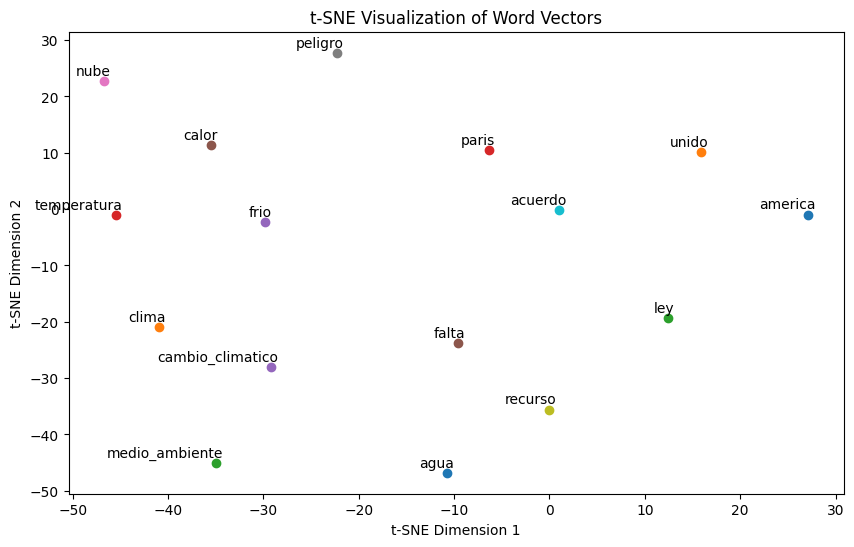

In [61]:
tsne_model = TSNE(n_components=2, random_state=42, perplexity=10)
tsne_vectors = tsne_model.fit_transform(word_vectors)

plt.figure(figsize=(10, 6))
for i, word in enumerate(words):
    plt.scatter(tsne_vectors[i, 0], tsne_vectors[i, 1])
    plt.annotate(word, xy=(tsne_vectors[i, 0], tsne_vectors[i, 1]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')

plt.title('t-SNE Visualization of Word Vectors')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()